# Step 0: Setup Environment

In [1]:
# !pip install folium
# !pip install missingno

In [2]:
# imports libraries
import pandas as pd 
import numpy as np 

import datetime as datetime 
import missingno as msno

import plotly.express as px
import folium

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# notebook configurations
pd.set_option('display.max_columns', None)

In [5]:
# import data for csvs
fcn = pd.read_csv('mark43_fieldcontacts_name_for_public_2020.csv')
fc = pd.read_csv('mark43_fieldcontacts_for_public_2020.csv')
cir = pd.read_csv('crime_incident_report_2020.csv')

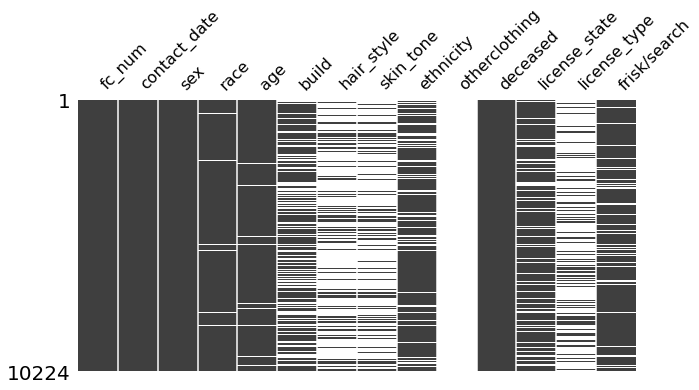

In [9]:
msno.matrix(fcn, figsize=(10, 5),sparkline=False);

### Keep for fcn
* fc_num
* contact_date
* sex
* race - create a new field called r&e 
* age


### Next Steps:
* TLDR; Feature Engineering / correlation between build, skin color, etc to understand threat level (will they be stopped)
* build (maybe)
* frisk/search (maybe)

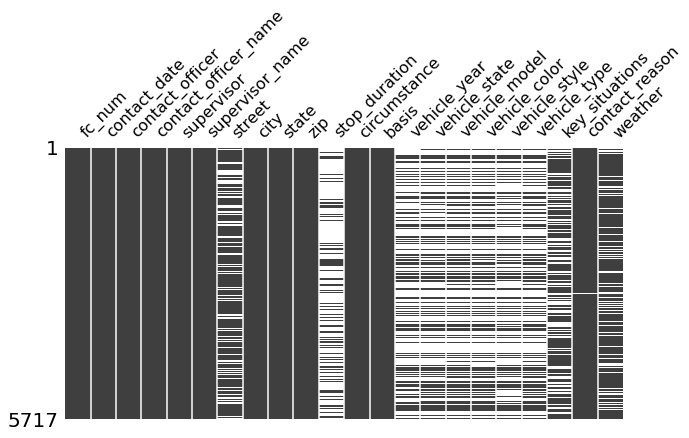

In [10]:
msno.matrix(fc, figsize=(10, 5), sparkline=False);

In [111]:
fc['weather'].unique()

array(['Clear (Night)', nan, 'Sunny', 'Raining', 'Cloudy/Partly Cloudy',
       'Overcast', 'Blowing Sand/Dirt/Snow', 'Other', 'Severe Cross Wind',
       'Snowing', 'Unknown', 'Sleet/Hail/Freezing Rain', 'Fog/Smog/Smoke'],
      dtype=object)

### Keep for fn

* fc_num
* contact_date
* supervisor - the id only not the name
* street
* city
* zip
* state - the data is kinda dirty 
* circumstance - very interesting
* basis - interesting 
* key_situations

### Next Steps:
* TLDR; topic modelling on contact reasons to understand the general trend of topics

* Key situations can be expanded for more analysis
* contact reasons can be paint a clear picture of the why and what
* Chris would like to predict stops based on weather. IDK how that will work?

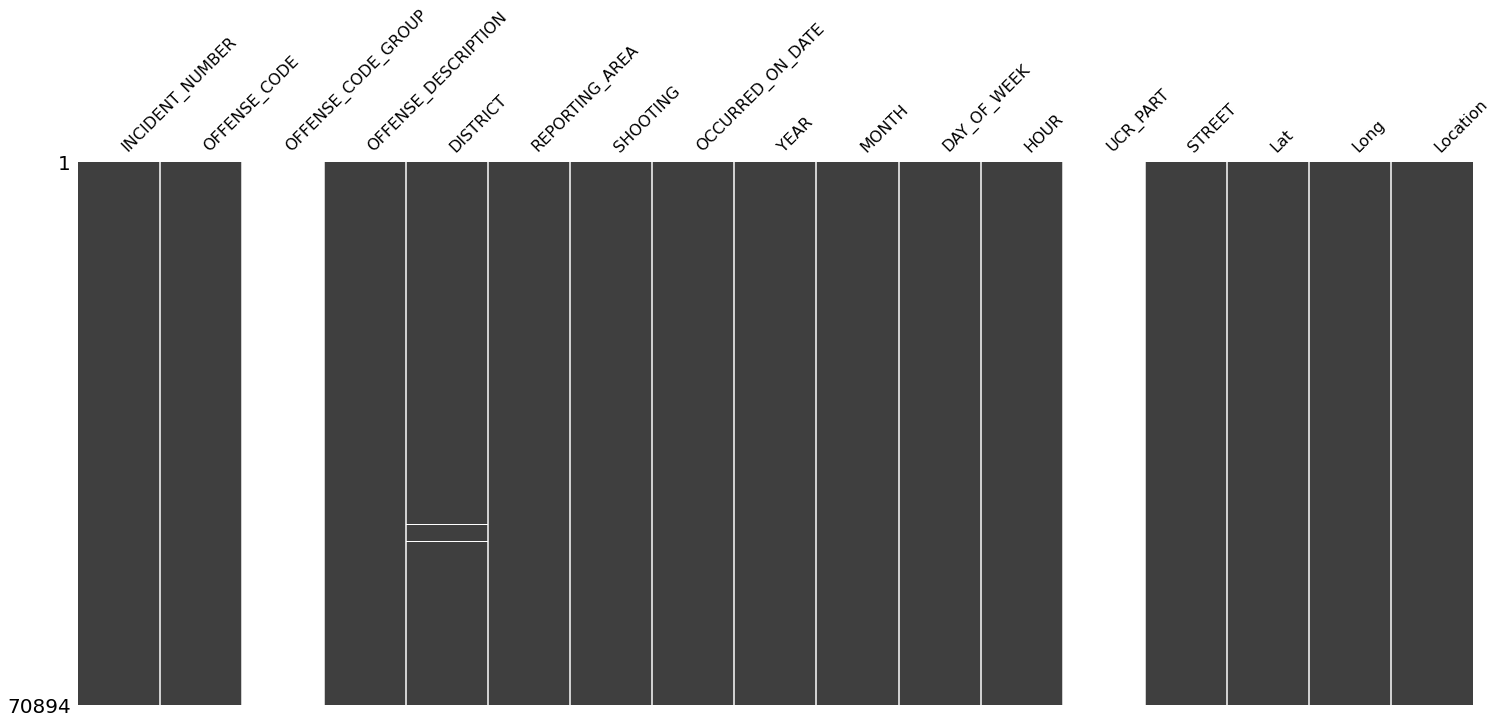

In [31]:
msno.matrix(cir, sparkline=False);

In [113]:
# msno.bar(fc);

In [112]:
# for i in fc['contact_reason'].head().tolist(): print(""), print(i)

In [114]:
# msno.bar(fcn);

In [42]:
fcn['ethnicity'].value_counts()

Not of Hispanic Origin    5838
Hispanic Origin           1794
Unknown                   1035
Name: ethnicity, dtype: int64

Boston Demographics - https://worldpopulationreview.com/us-cities/boston-ma-population

According to the most recent ACS, the racial composition of Bostonwas:

* White: 52.82%
* Black or African American: 25.23%
* Asian: 9.67%
* Other race: 6.65%
* Two or more races: 5.28%
* Native American: 0.29%
* Native Hawaiian or Pacific Islander: 0.06%

In [44]:
fcn['race'].value_counts(normalize=True)

Black                                        0.637191
White                                        0.311894
Unknown                                      0.028308
Other                                        0.013704
Asian                                        0.008603
Native Hawaiian or Other Pacific Islander    0.000300
Name: race, dtype: float64

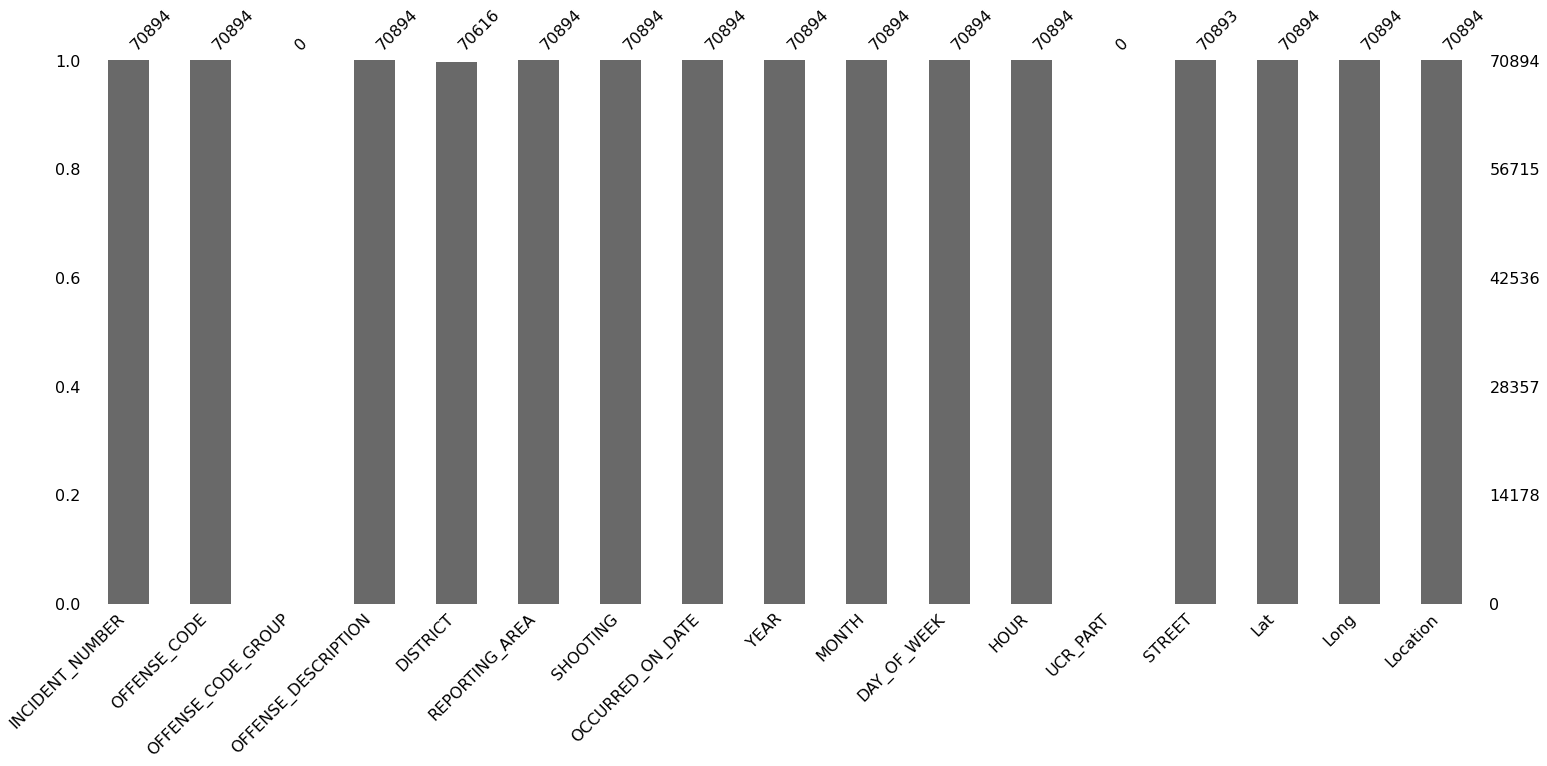

In [117]:
msno.bar(cir);

In [118]:
cir.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,854652314,3115,NaN,INVESTIGATE PERSON,B2,289,0,2020-02-20 00:00:00,2020,2,Thursday,0,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
1,457856954,3115,NaN,INVESTIGATE PERSON,B2,289,0,2020-02-21 01:42:00,2020,2,Friday,1,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
2,302030654,1106,NaN,FRAUD - CREDIT CARD / ATM FRAUD,D4,167,0,2020-04-24 13:00:00,2020,4,Friday,13,NaN,MASSACHUSETTS AVE,42.339542,-71.069409,"(42.3395419898301, -71.0694087696754)"
3,212025777,1108,NaN,FRAUD - WELFARE,A7,28,0,2020-05-01 00:00:00,2020,5,Friday,0,NaN,TRENTON ST,42.370818,-71.039291,"(42.3708180467024, -71.0392907813515)"
4,212025557,2670,NaN,HARASSMENT/ CRIMINAL HARASSMENT,A1,77,0,2020-09-07 00:00:00,2020,9,Monday,0,NaN,PRINCE ST,42.361839,-71.059765,"(42.3618385665647, -71.0597648909416)"
5,202089218,1108,NaN,FRAUD - WELFARE,A1,77,0,2020-11-12 12:00:00,2020,11,Thursday,12,NaN,STUART ST,0.000000,0.000000,"(0, 0)"
6,202085769,1108,NaN,FRAUD - WELFARE,A1,77,0,2020-11-16 09:58:00,2020,11,Monday,9,NaN,WASHINGTON ST,0.000000,0.000000,"(0, 0)"
7,212025189,1106,NaN,FRAUD - CREDIT CARD / ATM FRAUD,E18,520,0,2020-04-01 12:00:00,2020,4,Wednesday,12,NaN,BUCKINGHAM ST,42.256216,-71.124019,"(42.2562159204022, -71.1240194732902)"
8,202082109,3205,NaN,M/V PLATES - LOST,E13,465,0,2020-11-06 18:19:00,2020,11,Friday,18,NaN,COLUMBUS AVE,0.000000,0.000000,"(0, 0)"
9,212025025,616,NaN,LARCENY THEFT OF BICYCLE,A1,70,0,2020-12-25 12:00:00,2020,12,Friday,12,NaN,MOUNT VERNON ST,42.357879,-71.069680,"(42.357878706879, -71.0696797303973)"


In [140]:
pd.DataFrame(cir[['OFFENSE_CODE','OFFENSE_DESCRIPTION']].value_counts()).sort_values('OFFENSE_CODE').tail(50)

,,0
OFFENSE_CODE,OFFENSE_DESCRIPTION,
2914,VAL - OPERATING W/O AUTHORIZATION LAWFUL,90
3001,DEATH INVESTIGATION,359
3004,INJURY BICYCLE NO M/V INVOLVED,11
3005,SICK ASSIST,4236
3006,SICK/INJURED/MEDICAL - PERSON,2442
3007,SUDDEN DEATH,561
3008,SUICIDE / SUICIDE ATTEMPT,42
3018,SICK/INJURED/MEDICAL - POLICE,841
3029,PRISONER - SUICIDE / SUICIDE ATTEMPT,8


### Keep 

* Incident Number
* Offense Code - the first 2 or 3 numbers define the offense type. We can use this to group them. 
* Offense Desc
* District
* Reporting Area 
* Shooting
* Date 
* Year
* Month
* Day of Week
* Hour
* Street
* Lat 
* Long 
* Location 


In [119]:
# #cir.loc[cir['OFFENSE_DESCRIPTION'] == 'SICK ASSIST']['']
# cir['OFFENSE_DESCRIPTION'].value_counts(normalize=True)[:50]

In [120]:
# # Create folium map object
# flightmap = folium.Map(location=[cir.Lat.mean(), cir.Long.mean()], tiles="CartoDB positron", zoom_start=25, min_zoom=10)

# #Plot individual gps points
# for coord in cir[['Lat', 'Long','OFFENSE_DESCRIPTION' ]].sample(n=5000).values:
#     folium.CircleMarker(location=[coord[0],coord[1]], radius=1, color=coord[2]).add_to(flightmap)

# flightmap

In [121]:
# cir[['Location']]